**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [ ]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

In [26]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5,1,' y = 0.9 * x')

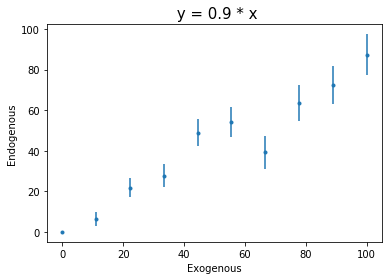

In [27]:
x = np.linspace(0,100,10)
y = line(0.9,x,0,errors=errors)
plt.figure(figsize=(6,4))
plt.errorbar(x,y,yerr=errors(x),linestyle='none',fmt='.')
plt.xlabel("Exogenous")
plt.ylabel("Endogenous")
plt.title(" y = 0.9 * x", fontsize=15)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [28]:
print('Y values are',y)
print('X values are', x)
print(sm.add_constant(x))

Y values are [  0.           6.35428471  21.73566816  27.80683593  48.87328199
  54.14664704  39.28420056  63.65307786  72.47477828  87.45208533]
X values are [   0.           11.11111111   22.22222222   33.33333333   44.44444444
   55.55555556   66.66666667   77.77777778   88.88888889  100.        ]
[[   1.            0.        ]
 [   1.           11.11111111]
 [   1.           22.22222222]
 [   1.           33.33333333]
 [   1.           44.44444444]
 [   1.           55.55555556]
 [   1.           66.66666667]
 [   1.           77.77777778]
 [   1.           88.88888889]
 [   1.          100.        ]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [29]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     437.6
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           6.11e-09
Time:                        20:07:27   Log-Likelihood:                -33.808
No. Observations:                  10   AIC:                             69.62
Df Residuals:                       9   BIC:                             69.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8361      0.040     20.919      0.000         0.746     0.927
==============================================================================
Omnibus:                        4.884   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                1.454
Skew:                          -0.811   Prob(JB):                        0.483
Kurtosis:                       3.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     108.7
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           6.20e-06
Time:                        20:07:28   Log-Likelihood:                -33.760
No. Observations:                  10   AIC:                             71.52
Df Residuals:                       8   BIC:                             72.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2907      4.651      0.277      0.788        -9.436    12.017
x1             0.8177      0.078     10.428      0.000         0.637     0.999
==============================================================================
Omnibus:                        4.164   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                1.172
Skew:                          -0.750   Prob(JB):                        0.556
Kurtosis:                       3.752   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Difference: 1. The right way adds an intercept to help explain part of Y that X can't explain. 2. The R-squared decreased from 0.970 to 0.884.

# 4. plot the data (as points) and both statsmodels fits

Text(0.5,1,'data points and two fitted lines')

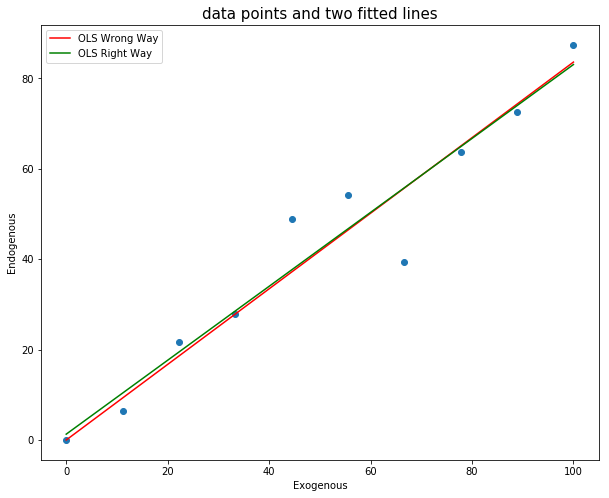

In [31]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y)
plt.plot(x,smfit.fittedvalues,'-', label = 'OLS Wrong Way',color='r')
plt.plot(x, smfit_right.fittedvalues,'-', label = 'OLS Right Way',color='g')

ax.set_xlabel('Exogenous')
ax.set_ylabel('Endogenous')
ax.legend()
ax.set_ylim()
pl.show
plt.title('data points and two fitted lines', fontsize = 15)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Errorbar plot of y = 1.5x + 105


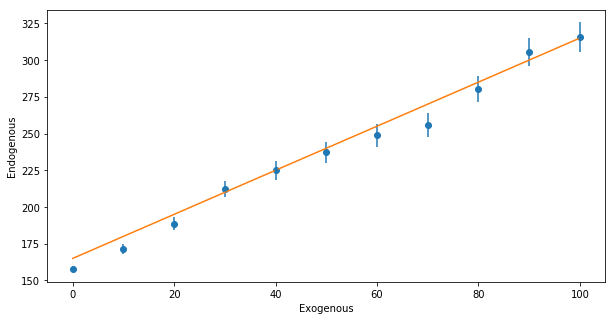

In [43]:
x = np.arange(0,110,10)
slope=1.5
intercept=105*slope
y=line(slope,x,intercept,errors=errors)
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
plt.figure(figsize = (6,4))
scatter = ax.scatter(x, y)
ax.errorbar(x, y, yerr=errors(x), fmt = '.')
ax.plot(x,line(slope,x,b=110*slope),'-')

ax.set_xlabel('Exogenous')
ax.set_ylabel('Endogenous')
print('Errorbar plot of y = 1.5x + 105')

# 6. repeat step 3

In [44]:
smfit = smf.OLS(y,x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     71.09
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           7.41e-06
Time:                        20:29:40   Log-Likelihood:                -64.444
No. Observations:                  11   AIC:                             130.9
Df Residuals:                      10   BIC:                             131.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.8192      0.453      8.432      0.000         2.810     4.828
==============================================================================
Omnibus:                        1.768   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                0.810
Skew:                           0.012   Prob(JB):                        0.667
Kurtosis:                       1.671   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     846.5
Date:                Fri, 16 Nov 2018   Prob (F-statistic):           3.26e-10
Time:                        20:29:59   Log-Likelihood:                -33.490
No. Observations:                  11   AIC:                             70.98
Df Residuals:                       9   BIC:                             71.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        158.2527      3.169     49.939      0.000       151.084   165.421
x1             1.5585      0.054     29.095      0.000         1.437     1.680
==============================================================================
Omnibus:                        2.264   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                0.612
Skew:                          -0.559   Prob(JB):                        0.736
Kurtosis:                       3.289   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [47]:
smfit_WLS = smf.WLS(y, sm.add_constant(x), weights= 1/np.sqrt(x)).fit()
smfit_WLS.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                         nan
Model:                            WLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 16 Nov 2018   Prob (F-statistic):                nan
Time:                        21:10:39   Log-Likelihood:                    nan
No. Observations:                  11   AIC:                               nan
Df Residuals:                      11   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const             nan        nan        nan        nan           nan       nan
x1                nan        nan        nan        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

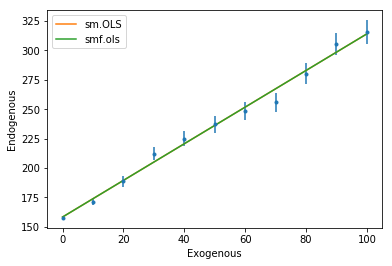

In [49]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit_right.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("Exogenous")
pl.ylabel("Endogenous")
pl.legend();